# Local Sensitivity Analysis

### SIR Model

We consider the SIR system

$\frac{dS}{dt} = -\alpha S I$  

$\frac{dI}{dt} = \alpha S I - \beta I$  

$\frac{dR}{dt} = \beta I$  

with parameters $\alpha$ (transmission) and $\beta$ (recovery).

We are interested in understanding how the solution for a specific parameter set changes with respect to small changes in the parameters (i,e., how the solution depends on the parameters).

Let's define the local sensitivity index $s_{S,\alpha}$ to be $\frac{\partial S}{\partial \alpha}$.  This is a measure of how the $S$ component of the solution changes with respect to the parameter $\alpha$.  We will use the convention that the subscript of the sensitivity index tells us what variable we are considering and what parameter we are considering.

The original system of ODEs tells us how $S$, $I$, and $R$ change with respect to time.  How does $s_{S,\alpha}$ change with respect to time?  To answer this questions, let's compute the time derivative:

$\frac{ds_{S,\alpha}}{dt} = \frac{d}{dt}{\frac{\partial S}{\partial \alpha}} = \frac{\partial}{\partial \alpha}{\frac{dS}{dt}} = \frac{\partial}{\partial \alpha} ({-\alpha S I})$
- the first equal sign is replacing the local sensitivity index with what it is defined to be
- the second equal sign is swapping the order of differentiation
- the third equal sign replaces $\frac{dS}{dt}$ with the right hand side of the differential equation in our model.

We now need to take the derivative.  Using the product rule
$\frac{\partial}{\partial \alpha}(-\alpha SI ) = (\frac{\partial}{\partial \alpha}{(-\alpha)})(SI) + (\frac{\partial}{\partial \alpha}{S})(-\alpha I) + (\frac{\partial}{\partial \alpha}{I})(-\alpha S)$

Simplifying, we have 
$\frac{ds_{S,\alpha}}{dt} = - S I - \alpha I s_{S, \alpha} - \alpha S s_{I, \alpha}$. 

(I have replaced $\frac{\partial}{\partial \alpha}{I}$ with the symbol for the sensitivity index $s_{I, \alpha}$, and similarly for $s_{S, \alpha}$.)

We do similar work to calculate the time derivatives of each of the local sensitivity indices (there will be four equations total, because it is enough to track $S$ and $I$ for a closed system, and there are two parameters, so there are four total combinations of a variable and parameter.

We couple these four equations with our original differential equations, and this is a system we can solve numerically.



$\frac{d s_{S,\alpha}}{dt} = - S I - \alpha I s_{S,\alpha} - \alpha S s_{I,\alpha}$  

$\frac{d s_{I,\alpha}}{dt} = S I + \alpha I s_{S,\alpha} + (\alpha S - \beta) s_{I,\alpha}$  
 
$\frac{d s_{S,\beta}}{dt}  = - \alpha I s_{S,\beta} - \alpha S s_{I,\beta}$ 

$\frac{d s_{I,\beta}}{dt}  = \alpha I s_{S,\beta} + (\alpha S - \beta) s_{I,\beta} - I$  

$\frac{dS}{dt} = -\alpha S I$  

$\frac{dI}{dt} = \alpha S I - \beta I$  



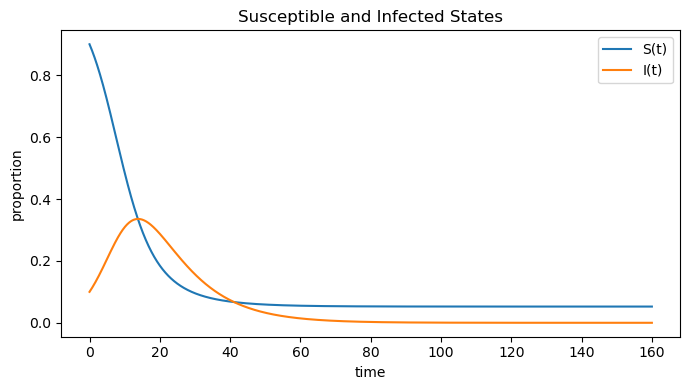

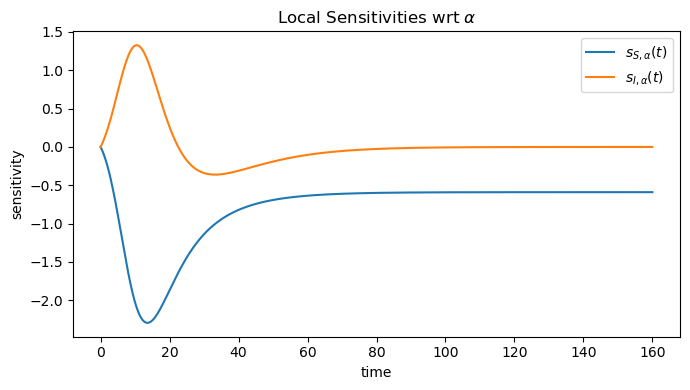

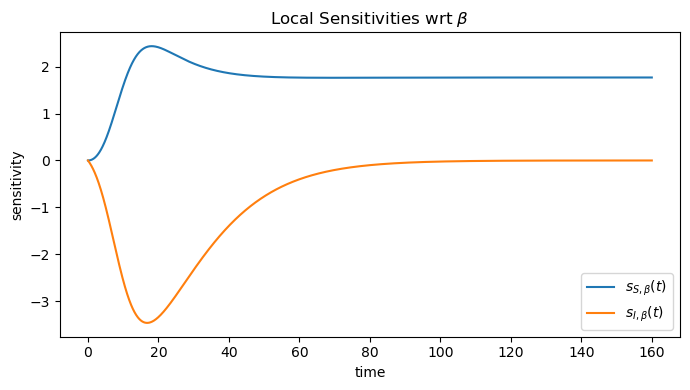

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parameters (feel free to adjust)
alpha = 0.3   # transmission
beta  = 0.1   # recovery

# Time span and evaluation grid
t = np.linspace(0, 160, 2000)

# Initial conditions for states
S0 = 0.9
I0 = 0.1

# Initial conditions for sensitivities: all start at 0
sS_a0 = 0.0
sI_a0 = 0.0
sS_b0 = 0.0
sI_b0 = 0.0

y0 = [S0, I0, sS_a0, sI_a0, sS_b0, sI_b0]

def rhs(y, t, alpha, beta):
    """ This function returns the right hand size of your ODE system """
    S, I, sS_a, sI_a, sS_b, sI_b = y

    # SIR
    dSdt = -alpha*S*I
    dIdt =  alpha*S*I - beta*I

    # Sensitivities
    dsSadt = -S*I - alpha*I*sS_a - alpha*S*sI_a
    dsIadt =  S*I + alpha*I*sS_a + (alpha*S - beta)*sI_a
    dsSbdt = -alpha*I*sS_b - alpha*S*sI_b
    dsIbdt =  alpha*I*sS_b + (alpha*S - beta)*sI_b - I

    return [dSdt, dIdt, dsSadt, dsIadt, dsSbdt, dsIbdt]


# Integrate
sol = odeint(rhs, y0, t, args=(alpha, beta), rtol=1e-8, atol=1e-10)

# Unpack solution
# sol is a 2D array where each column contains the trajectory of each variable and the rows are time steps
# .T transposes, so each row is now one variable trajectory
S, I, sS_a, sI_a, sS_b, sI_b = sol.T

# ---- Plots ----


# 1) S and I
plt.figure(figsize=(7, 4))
plt.plot(t, S, label='S(t)')
plt.plot(t, I, label='I(t)')
plt.xlabel('time')
plt.ylabel('proportion')
plt.title('Susceptible and Infected States')
plt.legend()
plt.tight_layout()
plt.show()

# 2) Sensitivities wrt alpha
plt.figure(figsize=(7, 4))
plt.plot(t, sS_a, label=r'$s_{S,\alpha}(t)$')
plt.plot(t, sI_a, label=r'$s_{I,\alpha}(t)$')
plt.xlabel('time')
plt.ylabel('sensitivity')
plt.title('Local Sensitivities wrt $\\alpha$')
plt.legend()
plt.tight_layout()
plt.savefig("wrtalpha.pdf")
plt.show()

# 3) Sensitivities wrt beta
plt.figure(figsize=(7, 4))
plt.plot(t, sS_b, label=r'$s_{S,\beta}(t)$')
plt.plot(t, sI_b, label=r'$s_{I,\beta}(t)$')
plt.xlabel('time')
plt.ylabel('sensitivity')
plt.title('Local Sensitivities wrt $\\beta$')
plt.legend()
plt.tight_layout()
plt.savefig("wrtbeta.pdf")
plt.show()



### How to interpret these graphs:
- A positive sensitivity index means increasing the parameter increases the state variable.

- A negative sensitivity index means increasing the parameter decreases the state variable.

- Consider the curve for $s_{S, \alpha}$.  It is usually negative meaning increasing $\alpha$ (the transmission rate) decreases $S$.  This matches our intuition because more people will move to the $I$ compartment.

- Consider the curve for $s_{I, \alpha}$.  It is positive early on, meaning that increasing $\alpha$ (the transmission rate) increases $I$.  This matches our intuition because more people will move to the $I$ compartment.  Later, as susceptibles are depleted, the effect diminishes.

- Notice that the peak infection on the graph for $S$ and $I$ roughly coincides with the peak and dip for the sensitivity indices.  This tells us that the epidemic size and timing is sensitive to $\alpha$ near the growth phase/peak.

- These are local sensitivites and are only valid around the baseline parameter values we chose.  Compared to global Sobol indices, these give derivative information at one point in parameter space rather across a wide range.

# Global Sensitivity Analysis Method: Sobol's Method and Implementation

### Sobol's method
When we build a model (for example, a system of differential equations), the output often depends on many parameters.  
Sobol's method is a way to figure out **which parameters matter most**.  (Stated alternatively, which parameters contribute the most to the variance in model outcome.)

The idea is:
- Each parameter is treated like a random variable within a range.  
- We run the model many times, each time with a different set of parameters.  

- We then measure how much each parameter contributes to the overall variation in the output.  

The result is a set of numbers between $0$ and $1$:
- A **first-order index** which tells us how much a parameter affects the output by itself.  
- A **total index** which tells us how much it affects the output *including interactions with other parameters*.  

### How SALib works
[SALib](https://salib.readthedocs.io/) is a Python package that makes this process easy:

1. Define your parameters and their ranges.  
2. Use SALib to create a clever set of random samples. (SALib uses a method called Saltelli's sampling scheme, which is a special kind of Monte Carlo sampling method.) 
3. Run your model on these samples.  
4. Use SALib to calculate Sobol's indices and see which parameters are most important.  

Sobol's method is a *variance decomposition* method.  
Formally:
$\text{Var}(Y) = V_1 + V_2 + V_{1,2} + \cdots$

where each $V_{i}$ or $V_{i,j}$, etc., term corresponds to the contribution of a parameter or a set of parameters to variance in model outcome.

The details can be found in the excellent book [Global Sensitivity Analysis: The Primer](https://www.andreasaltelli.eu/file/repository/A_Saltelli_Marco_Ratto_Terry_Andres_Francesca_Campolongo_Jessica_Cariboni_Debora_Gatelli_Michaela_Saisana_Stefano_Tarantola_Global_Sensitivity_Analysis_The_Primer_Wiley_Interscience_2008_.pdf) by Saltelli, et al. The details are beyond the scope of this class. 

In [ ]:
! pip install SALib # install SALib

/var/folders/xy/xym_q8_57pz2ff1dhfvmsdb80000gn/T/ipykernel_40190/768604021.py:47: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, 1024, calc_second_order=False)


First-order (peak I): [0.34696366 0.5731175 ]
Total-order  (peak I): [0.41777669 0.64286215]


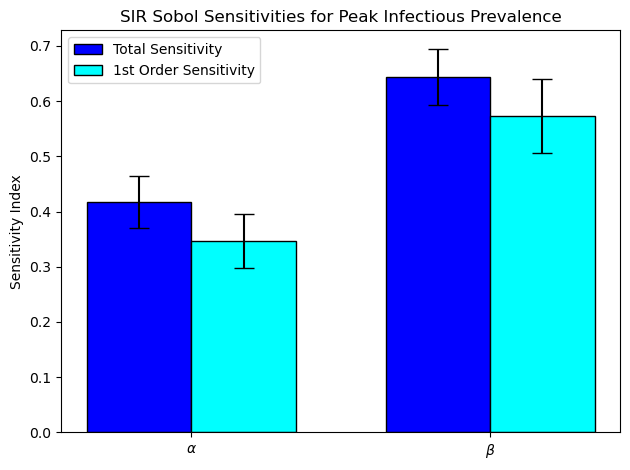

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from SALib.sample import saltelli
from SALib.analyze import sobol

# ---------- SIR ----------
def f(y, t, paras):
    S, I, R = y
    alpha, beta = paras
    dS = -alpha * S * I
    dI =  alpha * S * I - beta * I
    dR =  beta * I
    return [dS, dI, dR]

# ---------- Initial conditions & baseline params ----------
I0 = 0.1
S0 = 0.9
R0 = 0
y0 = [S0, I0, R0]

# time grid from 0 to 160 in 2000 steps
t = np.linspace(0, 160, 2000) 

# baseline parameter values
# these are not used directly in the runs, but are used to set the ranges of parameters for sampling
alpha = 0.3
beta  = 0.1

# ---------- GSA problem (vary alpha, beta) ----------
# let's vary each parmeter over an order of magnitude

vl, vr = 0.1, 10.0
problem = {
    'num_vars': 2, # there are 2 parameters in this system
    'names': ['alpha', 'beta'], # names of parameters
    'bounds': [
        [vl*alpha, vr*alpha], # bounds of parameters-- from .1 * parameter to 10 * parameter
        [vl*beta,  vr*beta ],
    ]
}

# ---------- Sampling ----------
# total model evaluations is N * (d + 2) where N is the second argument of the sample method, 
# d is the number of parameters (2 for this problem)
# this creates 4096 parameter samples from parameter space
param_values = saltelli.sample(problem, 1024, calc_second_order=False)

# ---------- Run sims & collect ONLY peak I ----------

# Broadly, we have many sampled parameter sets `(alpha, beta)` in `param_values`.  
# For each set, we:
# 1) solve the SIR ODEs,
# 2) extract the infectious curve `I(t)`,
# 3) record the peak of I(t) into Y_peakI[i].


# param_values is a 2D array with each column a parameter and each row a sample
# make an array we will fill in with space for the peak infection for each parameter sample
Y_peakI = np.zeros(param_values.shape[0]) 

for i in range(param_values.shape[0]):
    # grab the ith parameter set
    a, b = param_values[i, 0], param_values[i, 1]
    # solve the system of ODEs for that parameter set
    # odeint takes the RHS of the ODEs (f), the initial conditions (y0), time (t), and the parameters 
    # sol is a 2D array where each variable is stored in its own column in order SIR, and each row is a time point
    sol = odeint(f, y0, t, args=((a, b),))
    # grab I (second variable, so we index the second column with 1 because Python starts counting at 0)
    I = sol[:, 1]
    # store the peak (max) of I
    Y_peakI[i] = np.max(I)   # <-- peak prevalence only

# ---------- Sobol analysis on peak I ----------
# sobol.analyze is a function in the SALib that computes the sensitivity indices
# the output Si is a dictionary with keys like S1 for first order indices, 'ST' for total sensitivity indices
Si = sobol.analyze(problem, Y_peakI, calc_second_order=False, print_to_console=False)
print("First-order (peak I):", Si['S1'])
print("Total-order  (peak I):", Si['ST'])

# ---------- Plot ----------
S1, ST = Si['S1'], Si['ST']
S1c, STc = Si['S1_conf'], Si['ST_conf']

barWidth = 0.35
r1 = np.arange(len(ST))
r2 = r1 + barWidth

plt.figure()
plt.bar(r1, ST, width=barWidth, color = 'blue', edgecolor='black', yerr=STc, capsize=7, label='Total Sensitivity')
plt.bar(r2, S1, width=barWidth, color = 'cyan', edgecolor='black', yerr=S1c, capsize=7, label='1st Order Sensitivity')
plt.xticks(r1 + barWidth/2, [r'$\alpha$', r'$\beta$'])
plt.ylabel('Sensitivity Index')
plt.title('SIR Sobol Sensitivities for Peak Infectious Prevalence')
plt.legend()
plt.tight_layout()
plt.savefig("GSA_SIR.pdf")
plt.show()


### Tasks (Optional)

1. What if you use different baseline parameters for the local sensitivity analysis in the first example?  For example, if $\alpha = 0.9$ and $\beta  = 0.01$, does this change anything?  

2. Consider this version of the competitive species model: 

$\frac{dx}{dt} = r_x x(1 - \frac{x}{K_x}) - \alpha_{xy} x y$

$\frac{dy}{dt} = r_y y(1 - \frac{y}{K_y}) - \alpha_{yx} x y$  

In this model, the two species ($x$ and $y$) compete for the same resouce. Each species grows logisitically in the absence of the other species, with its own carry capacity $K_i$.  When the species interact, it is detrimental to both populations, and the parameters $\alpha_{ij}$ relates to how detrimental this effect is (it can be asymmetric between the species).  We studied this equation in Math 313 (see page 175 of the textbook, also linked to on Canvas).

Let baseline parameter values be $r_x = 2$, $K_x = 2$, $\alpha_{xy}=1$, $r_y = 3$, $K_y = 3$, $\alpha_{yx}=2$. 

- calculate the equations for the time derivative of the local sensitivity indices for this system.  This system has 6 parameters ($r_x$, $r_y$, $K_x$, $K_y$, $\alpha_{xy}$, $\alpha_{yx}$) and 2 state variables ($x$, $y$), so you should expect 12 equations!
- use these equations along with the original system and graph the local sensitivity indices.

3. Whew, that was a lot of work to find all 12 equations, and what we got out of that work is information just locally around the baseline parameter values.  Instead, conduct a GSA of the competitive species model, and vary parameters an order of magnitude in each direction.  For the outcome of interest, let's look at species $x$ at the final time.  To modify the code, you will need to change `Y_peakI[i] = np.max(I)` in the example above (which is tracking the peak infection) to `Y_xT[i] = x[-1]` (the index `-1` in Python grabs the last entry) and then pass `Y_xT` into `sobol.analyze()`.
